# Catalunya, administrative division
## **This notebook outputs a shp map of Catalonia that is necessary for other notebooks**
The new website where download the data is: https://www.icgc.cat/ca/Geoinformacio-i-mapes/Dades-i-productes/Geoinformacio-cartografica/Divisions-administratives. Unzip the .shp data and create a folder inside data with the files.

In [57]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import pprint

import os
 
# Get the list of all shp files in BCN500 directory
dir_list_cat = [x for x in os.listdir("../data/divisions-administratives/") if x[-4:]==".shp"]
# first number: resolution/ scale, second number: Date



In [58]:
# list only highest resolution
dir_list_cat = [x for x in os.listdir("../data/divisions-administratives/") if x[-21:]=="-1000000-20240705.shp"]


In [59]:
ids = {x:x[31:-21] for x in dir_list_cat}
# ids

We want to compare the regions the 'Competencies' data set provides with this maps. The data set had the following separation:

* Lleida &#8594; Lleida  (Provincia)
* Tarragona &#8594; Camp de Tarragona (Vegueria)
* Terres de l'Ebre &#8594; Terres de l'Ebre (Vegeria)
* Vallés Occidental &#8594; (comarca)
* Vallés Oriental + Maresme &#8594; (comarca)
* Girona &#8594; (Provincia)
* Catalunya central &#8594; (Comarca)
* Barcelona Comarques (the rest)
* Consocri BCN &#8594; municipi

So each 'municipi' in cat_maps must have the code of these regions

In [60]:
# We select only the municipis map
cat_maps = {}
maps = dir_list_cat[1]
cat_maps[ids[maps]] = gpd.read_file("../data/divisions-administratives/"+maps, crs="EPSG:4326")
mncps = cat_maps[ids[maps]]
mncps['NOMREGIO'] = ""

# We build the regions that the Competencies data set uses
mncps.loc[mncps["NOMPROV"] == "Lleida", "NOMREGIO"] = "Lleida"
mncps.loc[mncps["NOMPROV"] == "Girona", "NOMREGIO"] = "Girona"
mncps.loc[mncps["NOMPROV"] == "Tarragona", "NOMREGIO"] = "Tarragona"
mncps.loc[mncps["NOMPROV"] == "Barcelona", "NOMREGIO"] = "Barcelona Comarques"

mncps.loc[mncps["NOMVEGUE"] == "Terres de l'Ebre", "NOMREGIO"] = "Terres de l'Ebre"
mncps.loc[mncps["NOMVEGUE"] == "Catalunya Central", "NOMREGIO"] = "Catalunya Central"

mncps.loc[mncps["NOMCOMAR"] == "Vallès Occidental", "NOMREGIO"] = "Vallès Occidental"
mncps.loc[mncps["NOMCOMAR"] == "Vallès Oriental", "NOMREGIO"] = "Maresme - Vallès Oriental"
mncps.loc[mncps["NOMCOMAR"] == "Maresme", "NOMREGIO"] = "Maresme - Vallès Oriental"
mncps.loc[mncps["NOMCOMAR"] == "Selva", "NOMREGIO"] = "Maresme - Vallès Oriental"

mncps.loc[mncps["NOMCOMAR"] == "Baix Llobregat", "NOMREGIO"] = "Baix Llobregat"

mncps.loc[mncps["NOMCOMAR"] == "Barcelonès", "NOMREGIO"] = "Consorci d'Educació de Barcelona"

# display(mncps.loc[mncps.index[10]:mncps.index[10]])



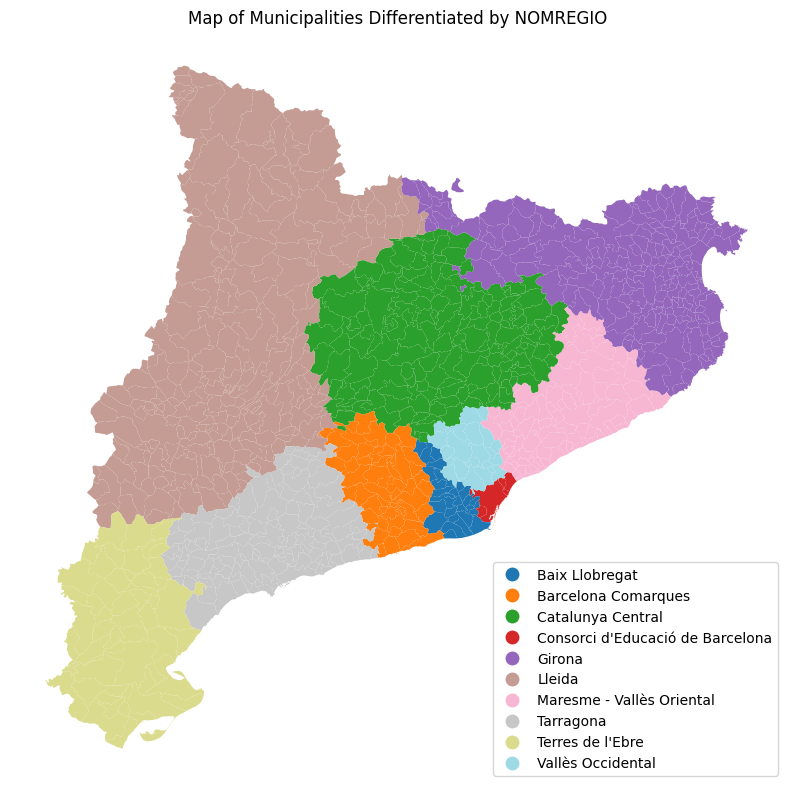

In [61]:
# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
mncps.plot(column='NOMREGIO', ax=ax, legend=True, cmap='tab20', legend_kwds={'loc': 'lower right'})

# Customize the plot
plt.title('Map of Municipalities Differentiated by NOMREGIO')
plt.axis('off')  # Turn off the axes
plt.show()


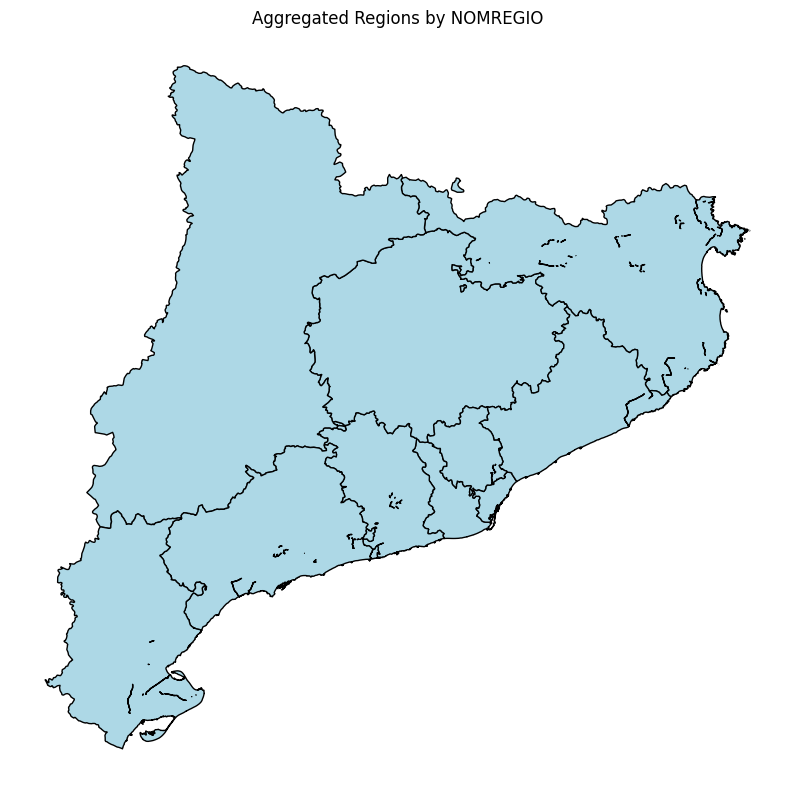

In [65]:
# Create a new GeoDataFrame by dissolving based on NOMREGIO
aggregated_regions = mncps.dissolve(by="NOMREGIO")

# Keep only the NOMREGIO and geometry columns in the new GeoDataFrame
aggregated_regions = aggregated_regions.reset_index()[["NOMREGIO", "geometry"]]

# Plot the aggregated regions
fig, ax = plt.subplots(figsize=(10, 10))
aggregated_regions.plot(ax=ax, color='lightblue', edgecolor='black')

# Customize the plot
plt.title('Aggregated Regions by NOMREGIO')
plt.axis('off')  # Hide axes for better visualization
plt.show()

## Saving and reloading 
**THIS CELL IS THE IMPORTANT ONE**

In [ ]:
# Save the mncps map with the new column
mncps.to_file("../data/Municipis/mncps.shp", driver="ESRI Shapefile")
regions.to_file("../data/Municipis/regions.shp", driver="ESRI Shapefile")

In [ ]:
# You can reload it with
mncps = gpd.read_file("../data/Municipis/mncps.shp")

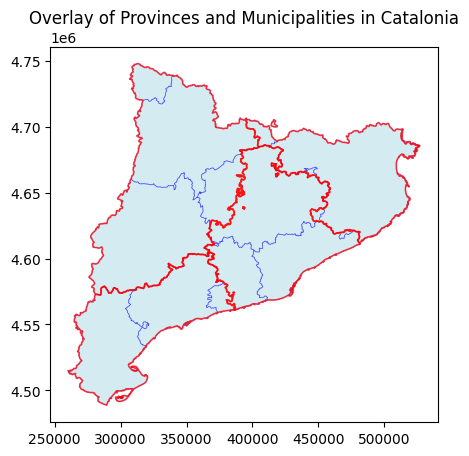

In [ ]:
# This is just playing around

maps = dir_list_cat[2]
cat_maps[ids[maps]] = gpd.read_file("../data/divisions-administratives/"+maps, crs="EPSG:4326")
mncps = cat_maps[ids[maps]]


maps = dir_list_cat[3]
cat_maps[ids[maps]] = gpd.read_file("../data/divisions-administratives/"+maps, crs="EPSG:4326")
prvncs = cat_maps[ids[maps]]
# Plot both layers on the same axes
fig, ax = plt.subplots(figsize=(5, 5))

# Plot municipalities with one color and transparency
mncps.plot(ax=ax, color='lightblue', edgecolor='blue', linewidth=0.5, alpha=0.5, label="Municipalities")

# Plot provinces with a different color and transparency
prvncs.plot(ax=ax, color='none', edgecolor='red', linewidth=1.2, alpha=0.7, label="Provinces")

# Customize and show the plot
plt.title("Overlay of Provinces and Municipalities in Catalonia")
plt.show()